In [178]:
import numpy as np
import scipy.stats as stats

In [179]:
def exo2(nchain, nballs, radius, prop_sd = 0.01, dim = 2):
    ## calcul de l'initialisation
    x_grid = np.arange(radius, 1 - radius, step = 2 * radius)
    y_grid = np.arange(radius, 1 - radius, step = 2 * radius)
    
    grid = np.array(np.meshgrid(x_grid, y_grid)).reshape(2, len(x_grid)**2).T
    idx = np.random.choice(len(x_grid)**2, nballs)
    
    init_x = grid[idx,0]
    init_y = grid[idx,1]    
    
    x_chain = np.zeros((nchain + 1, nballs))
    y_chain = np.zeros((nchain + 1, nballs))
                       
    x_chain[0,:] = init_x
    y_chain[0,:] = init_y
    acc_rates = 0.0
    
    for i in range(nchain):
        ## Proposition
        ##. )a Tirage au hasard d'une molécule
        idx = np.random.choice(nballs)
        x_prop = np.random.normal(x_chain[i, idx], prop_sd, 1)
        y_prop = np.random.normal(y_chain[i, idx], prop_sd, 1)
        
        ## Calcul de la proba d'acceptation
        ## la loi cible est une uniforme sous contrainte i.e, \propto 1 * 1{contraintes OK}
        ## le noyau est symétrique donc K(x, y) / K(y, x) = 1
        ## donc si les contraintes sont OK on accepte toujours
        
        contraintes_bord = x_prop > radius and x_prop < (1 - radius) and y_prop > radius and y_prop < (1 - radius)
        
        dist2prop = np.sqrt((x_chain[i, range(nballs) != idx] - x_prop)**2 + (y_chain[i, range(nballs) != idx] - y_prop)**2)
        contraintes_intersection = np.all(dist2prop > (2 * radius))
        
        ## Mise à jour
        x_chain[i+1,:] = x_chain[i,:]
        y_chain[i+1,:] = y_chain[i,:]
        if (contraintes_bord and contraintes_intersection):
            acc_prob = 1 ## si pas compris, demande à Noémie (mais il faut les contraintes satisfaites)
            x_chain[i+1,idx] = x_prop
            y_chain[i+1,idx] = y_prop
            ## mon erreur se trouvait ici je ne mettais à jour que le idx élement alors que les autres molécules restaient sur place !
            acc_rates += 1
        
    acc_rates /= nchain
    ## renvoie la chaine et le taux d'accetptation
    return x_chain, y_chain, acc_rates


In [180]:
## Un joli graphique
nchain = 10**4
nballs = 5
radius = 0.01
x_chain, y_chain, acc_rates = exo2(nchain, nballs, radius, prop_sd=0.01)
print(acc_rates)

0.1365


(0.0, 1.0)

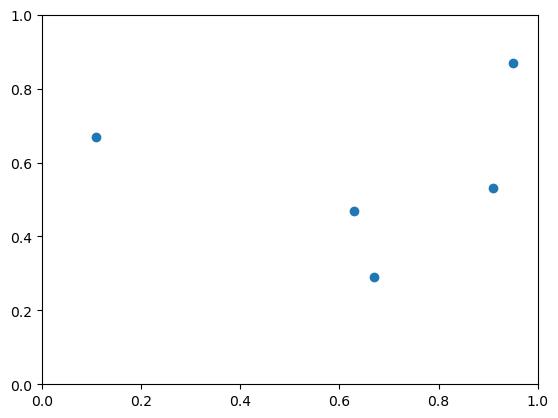

In [182]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
cols = ["red", "blue", "green", "orange", "black"]

plt.scatter(x_chain[0,:], y_chain[0,:])

plt.xlim(0, 1)
plt.ylim(0, 1)
## Bon le graphique est pas top car on voit pas le déplacement... :-(